<a href="https://www.kaggle.com/code/zeeshanahmadyar/ensemble-models-titanac-datadet?scriptVersionId=289877762" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Bagging Ensemble
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, precision_score

# warning code
import warnings
warnings.filterwarnings('ignore')


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanac-dataset/titanacdata.csv


# **Load Dataset**

In [2]:
df = pd.read_csv('/kaggle/input/titanac-dataset/titanacdata.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# **Handel Outliers**

<Axes: >

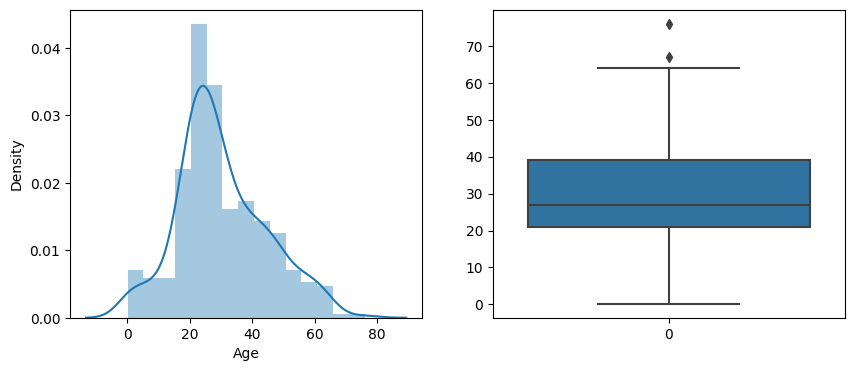

In [3]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.distplot(df['Age'])

plt.subplot(1, 2, 2)
sns.boxplot(df['Age'])

<Axes: >

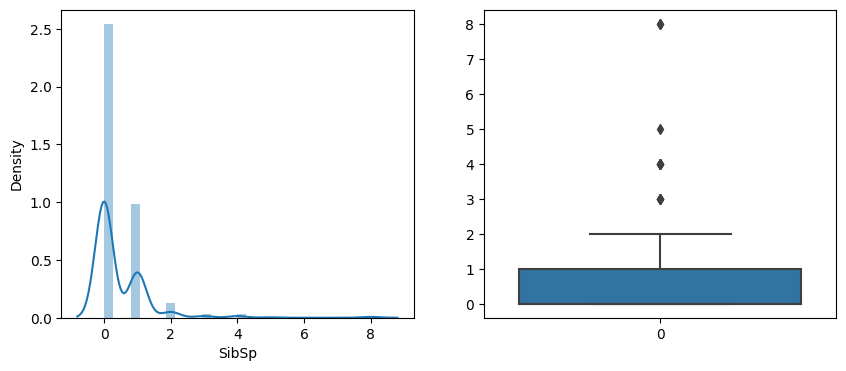

In [4]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.distplot(df['SibSp'])

plt.subplot(1, 2, 2)
sns.boxplot(df['SibSp'])

<Axes: >

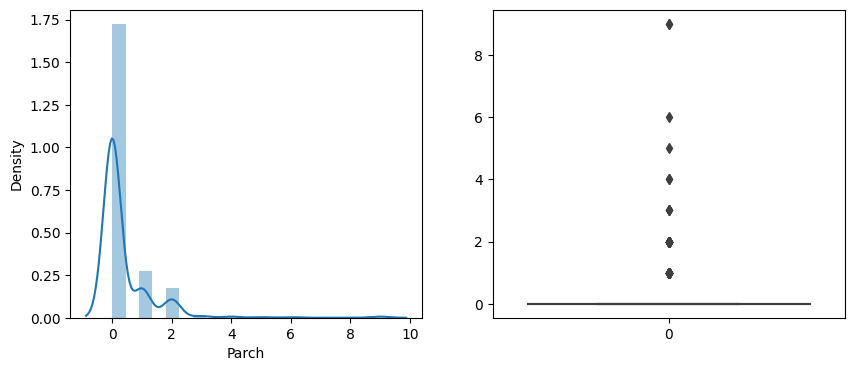

In [5]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.distplot(df['Parch'])

plt.subplot(1, 2, 2)
sns.boxplot(df['Parch'])

<Axes: >

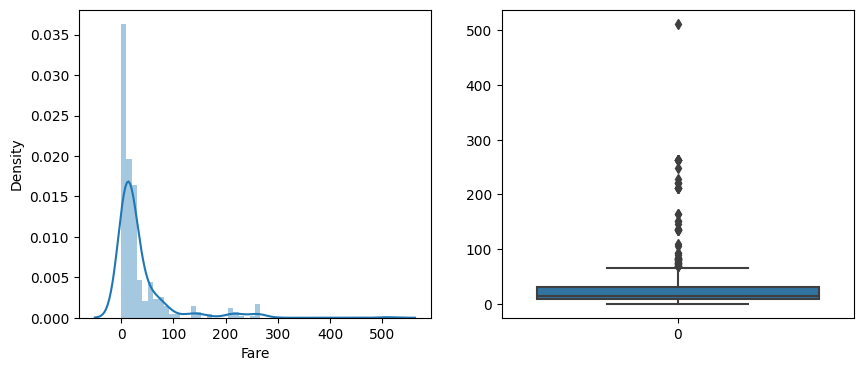

In [6]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.distplot(df['Fare'])

plt.subplot(1, 2, 2)
sns.boxplot(df['Fare'])

# **Remove Outliers using Persontile Method**

In [7]:
upper_limit = df['Age'].quantile(0.99)
lower_limit = df['Age'].quantile(0.01)

# caping
df['Age'] = np.where(
    df['Age'] >= upper_limit, 
    upper_limit,
    np.where(
        df['Age'] <= lower_limit,
        lower_limit,
        df['Age']
    )
)

In [8]:
upper_limit = df['SibSp'].quantile(0.99)
lower_limit = df['SibSp'].quantile(0.01)

# caping
df['SibSp'] = np.where(
    df['SibSp'] >= upper_limit, 
    upper_limit,
    np.where(
        df['SibSp'] <= lower_limit,
        lower_limit,
        df['SibSp']
    )
)

In [9]:
upper_limit = df['Parch'].quantile(0.99)
lower_limit = df['Parch'].quantile(0.01)

# caping
df['Parch'] = np.where(
    df['Parch'] >= upper_limit, 
    upper_limit,
    np.where(
        df['Parch'] <= lower_limit,
        lower_limit,
        df['Parch']
    )
)

In [10]:
upper_limit = df['Fare'].quantile(0.99)
lower_limit = df['Fare'].quantile(0.01)

# caping
df['Fare'] = np.where(
    df['Fare'] >= upper_limit, 
    upper_limit,
    np.where(
        df['Fare'] <= lower_limit,
        lower_limit,
        df['Fare']
    )
)

# **Handel Missing Values**

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0.0,0.0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1.0,0.0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0.0,0.0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0.0,0.0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1.0,1.0,3101298,12.2875,NaN,S


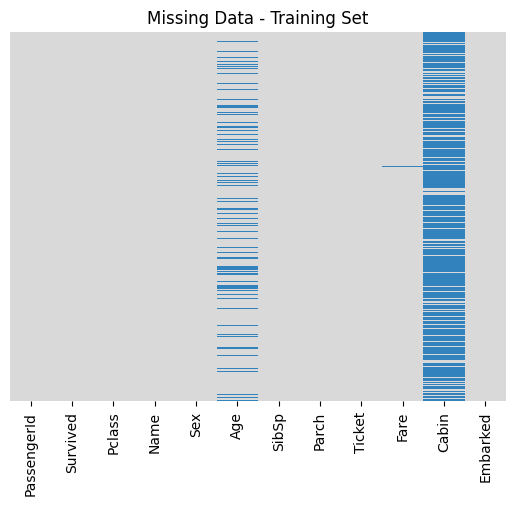

In [12]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='tab20c_r')
plt.title('Missing Data - Training Set')
plt.show()

In [13]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
df.drop(['PassengerId', 'Ticket', 'Name', 'Cabin'], axis=1, inplace=True)

In [15]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0.0,0.0,7.8292,Q
1,1,3,female,47.0,1.0,0.0,7.0000,S
2,0,2,male,62.0,0.0,0.0,9.6875,Q
3,0,3,male,27.0,0.0,0.0,8.6625,S
4,1,3,female,22.0,1.0,1.0,12.2875,S


# **Encode Categorical data**

In [16]:
df = pd.get_dummies(data=df, columns=['Sex', 'Embarked'], drop_first=True, dtype=int)

In [17]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,34.5,0.0,0.0,7.8292,1,1,0
1,1,3,47.0,1.0,0.0,7.0000,0,0,1
2,0,2,62.0,0.0,0.0,9.6875,1,1,0
3,0,3,27.0,0.0,0.0,8.6625,1,0,1
4,1,3,22.0,1.0,1.0,12.2875,0,0,1


In [18]:
df.to_csv('cleaned_titanac_dataset', index=False)

# **Check Correleation of dataset**

In [19]:
num_cols = df.select_dtypes(include=['int64', 'float64'])

# correlation matrix
corr = num_cols.corr()

In [20]:
corr1 = df.corr()['Survived']
print(corr1)

Survived      1.000000
Pclass       -0.108615
Age          -0.002704
SibSp         0.107205
Parch         0.198962
Fare          0.190207
Sex_male     -1.000000
Embarked_Q    0.115574
Embarked_S   -0.105883
Name: Survived, dtype: float64


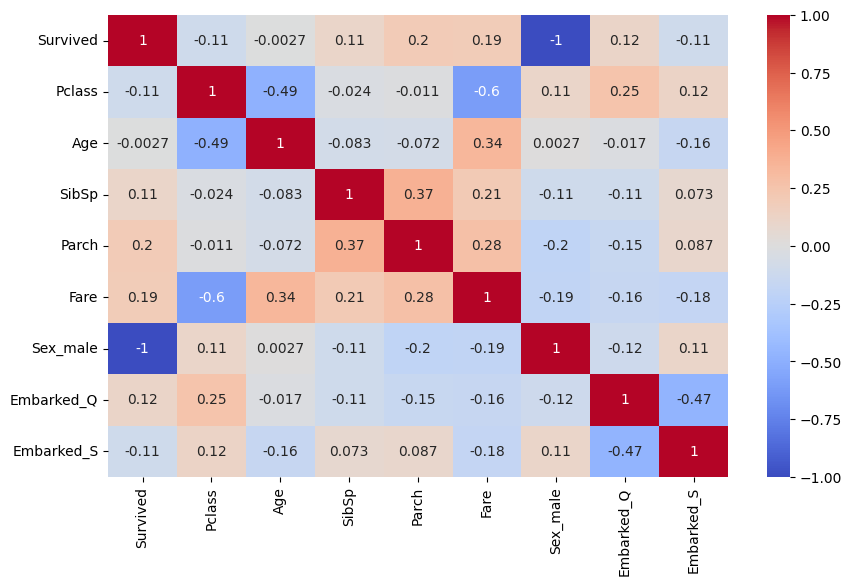

In [21]:
# heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [22]:
# Calculate mean Ages
class1_mean = df[df['Pclass'] == 1]['Age'].mean()
class2_mean = df[df['Pclass'] == 2]['Age'].mean()
class3_mean = df[df['Pclass'] == 3]['Age'].mean()

def impute_age(col):
    Pclass = col[0]
    Age = col[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return class1_mean
        elif Pclass == 2:
            return class2_mean
        else:
            return class3_mean
    else:
        return Age

# apply on Age columns
df['Age'] = df[['Pclass', 'Age']].apply(impute_age, axis=1)
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

# **Now divide data into X, y**

In [23]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# **Scaled Dataset before giving it to the Model**

In [25]:
# create instance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Now we train model on our data**
**We know in ensemble learning, there are different model types**

In [26]:
bagging_model = BaggingClassifier(estimator=SVC(probability=True), n_estimators=10)
bagging_model.fit(X_train_scaled, y_train)

BaggingClassifier(estimator=SVC(probability=True))

In [27]:
y_pred_bagging = bagging_model.predict(X_test)

# **Bagging Model Evaluation**

In [28]:
# accuracy
accuracy = accuracy_score(y_test, y_pred_bagging)
precision = precision_score(y_test, y_pred_bagging)
recall = recall_score(y_test, y_pred_bagging)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)

# confusion_matrix
confusion = confusion_matrix(y_test, y_pred_bagging)
print

Accuracy: 0.3253968253968254
Precision: 0.3253968253968254
Recall: 1.0


<function print(*args, sep=' ', end='\n', file=None, flush=False)>

# **Now we use build-in version of Bagging**

In [29]:
forest_model = RandomForestClassifier(n_estimators=15)
forest_model.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=15)

In [30]:
y_pred_forest = forest_model.predict(X_test)

In [31]:
# Evaluation


# accuracy
accuracy = accuracy_score(y_test, y_pred_forest)
precision = precision_score(y_test, y_pred_forest)
recall = recall_score(y_test, y_pred_forest)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)

# confusion_matrix
confusion = confusion_matrix(y_test, y_pred_forest)
print(confusion)

Accuracy: 0.6746031746031746
Precision: 0.0
Recall: 0.0
[[85  0]
 [41  0]]


# **Now work with 2nd type of Ensemble Boosting**

In [32]:
boosting_model = AdaBoostClassifier(estimator= GradientBoostingClassifier(), n_estimators=10)

In [33]:
boosting_model.fit(X_train_scaled, y_train)

AdaBoostClassifier(estimator=GradientBoostingClassifier(), n_estimators=10)

In [34]:
y_pred_boost = boosting_model.predict(X_test)

In [35]:
# Evaluation


# accuracy
accuracy = accuracy_score(y_test, y_pred_boost)
precision = precision_score(y_test, y_pred_boost)
recall = recall_score(y_test, y_pred_boost)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)

# confusion_matrix
confusion = confusion_matrix(y_test, y_pred_boost)
print(confusion)

Accuracy: 0.6746031746031746
Precision: 0.0
Recall: 0.0
[[85  0]
 [41  0]]


# **Now we use 3rd type Stacking**

In [36]:
# define base model
estimators = [
    ('tree', DecisionTreeClassifier()),
    ('rfc', RandomForestClassifier()),
    ('svm', SVC(probability=True))
]

stacking_model = StackingClassifier(
    estimators = estimators, final_estimator = LogisticRegression()
)

In [37]:
stacking_model.fit(X_train_scaled, y_train)

StackingClassifier(estimators=[('tree', DecisionTreeClassifier()),
                               ('rfc', RandomForestClassifier()),
                               ('svm', SVC(probability=True))],
                   final_estimator=LogisticRegression())

In [38]:
y_pred_stacking = stacking_model.predict(X_test)

In [39]:
# Evaluation


# accuracy
accuracy_stack = accuracy_score(y_test, y_pred_stacking)
precision_stack = precision_score(y_test, y_pred_stacking)
recall_stack = recall_score(y_test, y_pred_stacking)

print('Accuracy:', accuracy_stack)
print('Precision:', precision_stack)
print('Recall:', recall_stack)

# confusion_matrix
confusion_stack = confusion_matrix(y_test, y_pred_stacking)
print(confusion_stack)

Accuracy: 0.6746031746031746
Precision: 0.0
Recall: 0.0
[[85  0]
 [41  0]]
